# Which Borough in London is for Me?
## Introduction:

The capital of the UK, London, experience a growth of 200,000 domestic residents every year. The city attracts all types of people from around the UK and around the world as it offers many oppurtunities and experiences. The city is growing in population. However, with every large city comes the abundant amount of criminal offenses. The London Datastore has a table consisting of the crime rate for each borough as well as the number of offences.

## The Problem:


When people move to a new location, it is in their interest to identify the area they would be most comfortable in. This depends on what type of person but for the project's sake, we will be looking to find the ideal location in london. The project will attempt to identify the safest borough in London based on the rates and the number of incidents, there will then be exploration of the neighborhoods to find common venues and the neighborhoods will also be clustered using k-mean methods.

## The Data:

The London Datastore has a datset that has the crime rate for each borough from year 1999-00, to 2016-17. The most relevant data will be the data in 2016-17.


From the wiki page: https://en.wikipedia.org/wiki/List_of_London_boroughs , data about the boroughs will be scraped and processed.

This will be used along with Fouresquare API to locate venues nearby and other relevant information on the neigborhood. 

**Data to be used:**

**From the wiki page:**
* Borough: the name of the borough
* Inner: Categorising the borough as an inner London or outer London Borough
* Status: Royal, City or other 
* Local Authority: The local authority assigned to the borough
* Political Control:The political party controlling the borough
* Headquarters: HQ of the Borough
* Area(sq mi): Area of the Borough in Sq miles
* Coordinates: The latitude and longitude of the borough

**From the London Datastore dataset**
* Code: Code of records
* Borough: Name of borough 
* Year: year of reporting
* Offences: type of offences
* Rate: Crime rate
* Number of offences: number of offences

### Part 1: Processing the data from the London Datastore Dataset


Importing the neccessary libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

#Other librarires
import html5lib 


print('Libraries imported.')

Matplotlib version:  3.1.3
Libraries imported.


In [7]:
df = pd.read_csv('https://data.london.gov.uk/download/recorded_crime_rates/c051c7ec-c3ad-4534-bbfe-6bdfee2ef6bb/crime%20rates.csv',thousands=',')

df.tail()


,Code,Borough,Year,Offences,Rate,Number_of_offences
6655,NaN,Heathrow,2016-17,Other Notifiable Offences,NaN,1081.0
6656,E13000001,Inner London,2016-17,Other Notifiable Offences,1.7,6041.0
6657,E13000002,Outer London,2016-17,Other Notifiable Offences,1.3,6637.0
6658,E12000007,Met Police Area,2016-17,Other Notifiable Offences,1.6,13759.0
6659,727,England and Wales,2016-17,Other Notifiable Offences,NaN,NaN


In [8]:
df.shape

(6660, 6)

It is evident that the dataframe is quite large, this will not be a present issue as the dataframe will be reduced to only the years 2016-17. The data should also be cleaned up so that there are not any null values.

In [9]:
#removing the data that is not related to the year 2016-17
df.drop(df.index[df['Year'] != '2016-17'],inplace = True)

#removing 'England and Wales', 'Inner London', 'Outer London' and 'Met Police Area' from the df as they are not boroughs of london
df.drop(df.index[df['Borough'] == 'England and Wales'],inplace = True)
df.drop(df.index[df['Borough'] == 'Inner London'],inplace = True)
df.drop(df.index[df['Borough'] == 'Outer London'],inplace = True)
df.drop(df.index[df['Borough'] == 'Met Police Area'],inplace = True)
#resetting the index and dropping the previous index
df = df.reset_index(drop = True)
df_csv= df
df.shape

(330, 6)

In [10]:
df

,Code,Borough,Year,Offences,Rate,Number_of_offences
0,E09000002,Barking and Dagenham,2016-17,All recorded offences,70.9,14638.0
1,E09000003,Barnet,2016-17,All recorded offences,55.8,21549.0
2,E09000004,Bexley,2016-17,All recorded offences,45.6,11163.0
3,E09000005,Brent,2016-17,All recorded offences,70.8,23237.0
4,E09000006,Bromley,2016-17,All recorded offences,52.7,17243.0
5,E09000007,Camden,2016-17,All recorded offences,103.1,25390.0
6,E09000008,Croydon,2016-17,All recorded offences,67.4,25777.0
7,E09000009,Ealing,2016-17,All recorded offences,69.0,23684.0
8,E09000010,Enfield,2016-17,All recorded offences,58.5,19401.0
9,E09000011,Greenwich,2016-17,All recorded offences,71.6,20023.0


The dataframe includes the total recorded offences for each borough. It also includes the total offences within a category these categories of offences can be found:

In [11]:
df['Offences'].unique()

array(['All recorded offences', 'Violence Against the Person',
       'Sexual Offences', 'Robbery', 'Burglary', 'Theft and Handling',
       'Fraud or Forgery', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences'], dtype=object)

With the values of the total, a new dataframe will be created showcasing the total crime in each borough.

In [13]:
df_total =df[['Borough','Offences','Rate','Number_of_offences']].copy()

df.drop(df.index[df['Offences'] != 'All recorded offences'],inplace = True)

df_total = df_total.reset_index(drop = True)

df_total= df_total.drop(columns=['Offences'])
df_total

,Borough,Rate,Number_of_offences
0,Barking and Dagenham,70.9,14638.0
1,Barnet,55.8,21549.0
2,Bexley,45.6,11163.0
3,Brent,70.8,23237.0
4,Bromley,52.7,17243.0
5,Camden,103.1,25390.0
6,Croydon,67.4,25777.0
7,Ealing,69.0,23684.0
8,Enfield,58.5,19401.0
9,Greenwich,71.6,20023.0


In [14]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Borough             33 non-null     object 
 1   Rate                32 non-null     float64
 2   Number_of_offences  33 non-null     float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


### Part 2: Scraping information from the Wikipedia Page

In [15]:
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
web_df = pd.read_html(url)
#creating a dataframe from the webpage
web_df2 = web_df[1]
web_df = web_df[0]
web_df

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


Merging dataframes

In [16]:
web_df2.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']
web_df = web_df.append(web_df2, ignore_index = True) 
web_df.tail()


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


Removing unnecessary data found in the table

In [17]:

web_df = web_df.replace('note 1','', regex=True) 
web_df = web_df.replace('note 2','', regex=True) 
web_df = web_df.replace('note 3','', regex=True) 
web_df = web_df.replace('note 4','', regex=True) 
web_df = web_df.replace('note 5','', regex=True) 

# View the top of the data set
web_df

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [],[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [18]:
web_df.shape

(33, 10)

Checking whether the Boroughs match in both dataframes.

In [19]:
set(df.Borough) - set(web_df.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham', 'Heathrow'}

This is because of the [] present in dataframes

In [20]:
web_df.iloc[0,0] = 'Barking and Dagenham'
web_df.iloc[9,0] = 'Greenwich'
web_df.iloc[11,0] = 'Hammersmith and Fulham'
df.iloc[32,1] = 'City of London'



We assume here that Heathrow and City of London are the same

In [21]:
set(df.Borough) - set(web_df.Borough)

set()

In [22]:
#combining the dfs
df_new = pd.merge(df, web_df, on='Borough')
df_new

,Code,Borough,Year,Offences,Rate,Number_of_offences,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,E09000002,Barking and Dagenham,2016-17,All recorded offences,70.9,14638.0,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,E09000003,Barnet,2016-17,All recorded offences,55.8,21549.0,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,E09000004,Bexley,2016-17,All recorded offences,45.6,11163.0,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,E09000005,Brent,2016-17,All recorded offences,70.8,23237.0,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,E09000006,Bromley,2016-17,All recorded offences,52.7,17243.0,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,E09000007,Camden,2016-17,All recorded offences,103.1,25390.0,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,E09000008,Croydon,2016-17,All recorded offences,67.4,25777.0,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,E09000009,Ealing,2016-17,All recorded offences,69.0,23684.0,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,E09000010,Enfield,2016-17,All recorded offences,58.5,19401.0,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,E09000011,Greenwich,2016-17,All recorded offences,71.6,20023.0,[],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [23]:
df_new.shape

(33, 15)

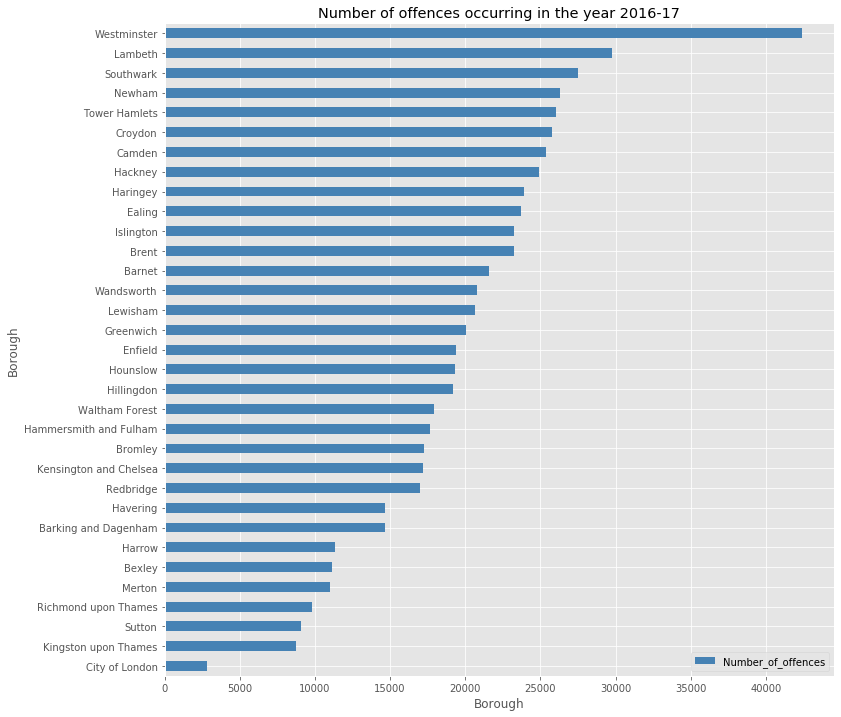

In [24]:

df_new =  df_new.sort_values(by=['Number_of_offences'])
df_new.plot(kind='barh', figsize=(12, 12), color='steelblue',x = 'Borough', y = 'Number_of_offences')

plt.xlabel('Borough')
plt.title('Number of offences occurring in the year 2016-17')
plt.show()

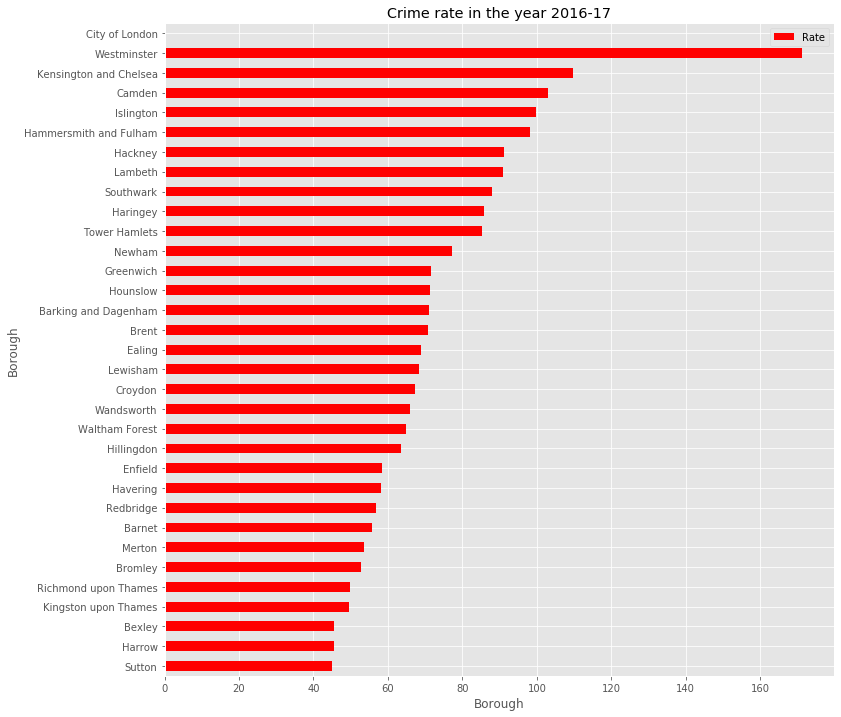

In [25]:

df_new =  df_new.sort_values(by=['Rate'])
df_new.plot(kind='barh', figsize=(12, 12), color='red',x = 'Borough', y = 'Rate')

plt.xlabel('Borough')
plt.title('Crime rate in the year 2016-17')
plt.show()

The data shows the number of criminal offences and crime rate for each borough, the graphs shows there is some differences between the boroughs. Before drawing or making any conclusions from the graphs it should be understood that these are historical graphs and represent the year 2016-17. 

As the 'rate' is not entirely clear, we shall draw conclusions from the graph using the number of offences. We can see that the  boroughs with **highest number of criminal offences** are:
* Westminster
* Lambeth
* Southawk
* Newham
* Tower Hamlets

Whereas the boroughs with the **lowest number of criminal offences** are:
* City of London
* Kingston upon Thames
* Sutton
* Richmond upon Thames
* Merton

Since the City of London is actually not a borough of london, the safest borough is   
  <i>**Kingston upon Thames**</i>. To showcase the type of crimes that occur in this borough we can plot a bar chart.

#### Visulalisation of the crime present in Kingston upon Thames

In [26]:
df_csv = pd.read_csv('https://data.london.gov.uk/download/recorded_crime_rates/c051c7ec-c3ad-4534-bbfe-6bdfee2ef6bb/crime%20rates.csv',thousands=',')
df_csv

,Code,Borough,Year,Offences,Rate,Number_of_offences
0,E09000002,Barking and Dagenham,1999-00,All recorded offences,120.5,19567.0
1,E09000003,Barnet,1999-00,All recorded offences,98.0,30708.0
2,E09000004,Bexley,1999-00,All recorded offences,95.1,20680.0
3,E09000005,Brent,1999-00,All recorded offences,127.7,33253.0
4,E09000006,Bromley,1999-00,All recorded offences,89.8,26474.0
5,E09000007,Camden,1999-00,All recorded offences,241.0,45800.0
6,E09000008,Croydon,1999-00,All recorded offences,113.7,37743.0
7,E09000009,Ealing,1999-00,All recorded offences,128.2,38737.0
8,E09000010,Enfield,1999-00,All recorded offences,104.8,28588.0
9,E09000011,Greenwich,1999-00,All recorded offences,141.4,29991.0


In [27]:
df_csv.drop(df_csv.index[df_csv['Year'] != '2016-17'],inplace = True)#removing the data that is not related to the year 2016-17

#removing 'England and Wales', 'Inner London', 'Outer London' and 'Met Police Area' from the df as they are not boroughs of london
df_csv.drop(df_csv.index[df_csv['Borough'] == 'England and Wales'],inplace = True)
df_csv.drop(df_csv.index[df_csv['Borough'] == 'Inner London'],inplace = True)
df_csv.drop(df_csv.index[df_csv['Borough'] == 'Outer London'],inplace = True)
df_csv.drop(df_csv.index[df_csv['Borough'] == 'Met Police Area'],inplace = True)
#resetting the index and dropping the previous index
df_csv = df_csv.reset_index(drop = True)


In [28]:
df_csv.drop(df_csv.index[df_csv['Borough'] != 'Kingston upon Thames'],inplace = True)
df_csv

,Code,Borough,Year,Offences,Rate,Number_of_offences
19,E09000021,Kingston upon Thames,2016-17,All recorded offences,49.6,8739.0
52,E09000021,Kingston upon Thames,2016-17,Violence Against the Person,15.7,2758.0
85,E09000021,Kingston upon Thames,2016-17,Sexual Offences,1.7,292.0
118,E09000021,Kingston upon Thames,2016-17,Robbery,2.5,449.0
151,E09000021,Kingston upon Thames,2016-17,Burglary,4.6,804.0
184,E09000021,Kingston upon Thames,2016-17,Theft and Handling,18.2,3212.0
217,E09000021,Kingston upon Thames,2016-17,Fraud or Forgery,0.1,10.0
250,E09000021,Kingston upon Thames,2016-17,Criminal Damage,5.1,899.0
283,E09000021,Kingston upon Thames,2016-17,Drugs,3.4,592.0
316,E09000021,Kingston upon Thames,2016-17,Other Notifiable Offences,0.8,146.0


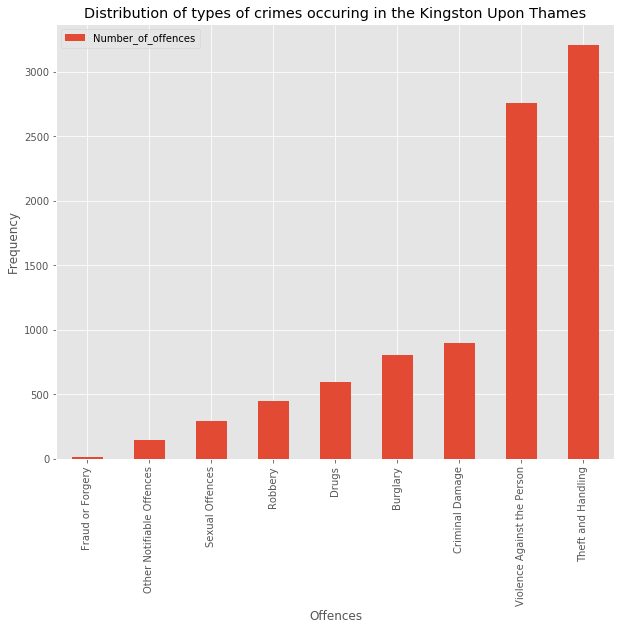

In [106]:
#drop the total offences
df_csv.drop(df_csv.index[df_csv['Offences'] == 'All recorded offences'],inplace = True)
df_csv =  df_csv.sort_values(by=['Number_of_offences'])

df_csv.plot(kind='bar', figsize=(10, 8),x = 'Offences', y = 'Number_of_offences')

plt.ylabel('Frequency')
plt.title('Distribution of types of crimes occuring in the Kingston Upon Thames')
plt.show()

The graph shows how few different acts of crime occur in Kingston upon Thames

### Part 3: Differentiating the neighborhoods in the Kingston upon Thames

From the internet, a list of Neighbors in the Borough off Kingston upon Thames.

In [64]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

In [65]:
lat =[]
long = []

for i in df_kut['Neighborhood']:
    adress = (i+' ,London, UK')
    #print(adress)
    geolocator = Nominatim (user_agent = "London_agent")
    location = geolocator.geocode(adress)
    lat.append(location.latitude)
    long.append(location.longitude)
#print(lat,long)

dicti = {'Neighborhood': Neighborhood,'Latitude': lat,'Longitude':long}
df_kut = pd.DataFrame(data=dicti, columns=['Neighborhood', 'Latitude', 'Longitude'], index=None)

df_kut

,Neighborhood,Latitude,Longitude
0,Berrylands,51.393781,-0.284802
1,Canbury,51.417499,-0.305553
2,Chessington,51.358336,-0.298622
3,Coombe,51.419450,-0.265398
4,Hook,51.367898,-0.307145
5,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,51.431850,-0.258138
7,Malden Rushett,51.341052,-0.319076
8,Motspur Park,51.390985,-0.248898
9,New Malden,51.405335,-0.263407


# Venues within the Neigborhoods

Finding nearby venues in each of the neighborhoods:

In [70]:
CLIENT_ID = "B511ZADCRSTLWACJ4VJFPV3D20VDDBF0GPQPA5ZWBEZRKPDM"
CLIENT_SECRET = "YQLHZTM0KI4YPKJV5YLP4LABUYCDLERTZ1Y5QKYU21EVFSHK"
VERSION = "20180604"
radius=500
LIMIT = 30
venues_list = []
for name, lat, lng in zip(dicti['Neighborhood'], dicti['Latitude'],dicti['Longitude']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        lat, 
        lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighborhood', 
              'Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']
nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub
5,Canbury,51.417499,-0.305553,The Grey Horse,51.414192,-0.300759,Pub
6,Canbury,51.417499,-0.305553,Cakewalk Patisserie & Coffee House,51.418626,-0.301704,Café
7,Canbury,51.417499,-0.305553,DoubleTree by Hilton,51.413548,-0.305378,Hotel
8,Canbury,51.417499,-0.305553,Pisces Fish Kitchen (Kingston),51.414803,-0.300782,Fish & Chips Shop
9,Canbury,51.417499,-0.305553,Down Hall Road,51.413581,-0.307660,Plaza


#### One hot Encoding

In [72]:
# one hot encoding
kut_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Market,Mexican Restaurant,Park,Pet Café,Pharmacy,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Wine Shop,Yoga Studio
0,Berrylands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hotel,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Market,Mexican Restaurant,Park,Pet Café,Pharmacy,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Wine Shop,Yoga Studio
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.285714,0.000000,0.000000,0.000000,0.0000,0.000000,0.071429,0.0000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Coombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hook,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [74]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                   venue  freq
0   Gym / Fitness Center  0.33
1                   Park  0.33
2               Bus Stop  0.33
3  Portuguese Restaurant  0.00
4                  Plaza  0.00


----Canbury----
                  venue  freq
0                   Pub  0.29
1  Gym / Fitness Center  0.07
2           Supermarket  0.07
3     Fish & Chips Shop  0.07
4                  Park  0.07


----Coombe----
                venue  freq
0            Tea Room   1.0
1    Asian Restaurant   0.0
2  Mexican Restaurant   0.0
3               Plaza   0.0
4            Platform   0.0


----Hook----
               venue  freq
0  Indian Restaurant  0.25
1             Bakery  0.25
2  Fish & Chips Shop  0.25
3        Supermarket  0.25
4   Asian Restaurant  0.00


----Kingston Vale----
              venue  freq
0     Grocery Store  0.25
1               Bar  0.25
2    Sandwich Place  0.25
3      Soccer Field  0.25
4  Asian Restaurant  0.00


----Kingston upon Thames----
              venue  fre

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Yoga Studio,Fish & Chips Shop,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Food
1,Canbury,Pub,Shop & Service,Supermarket,Plaza,Café,Indian Restaurant,Hotel,Spa,Park,Fish & Chips Shop
2,Coombe,Tea Room,Yoga Studio,Food,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant
3,Hook,Bakery,Indian Restaurant,Supermarket,Fish & Chips Shop,Yoga Studio,Food,Department Store,Dry Cleaner,Electronics Store,Farmers Market
4,Kingston Vale,Grocery Store,Bar,Sandwich Place,Soccer Field,Gastropub,Garden Center,German Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant


## Clustering Neighborhoods

In [79]:
# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 2, 1, 0, 1, 3, 4, 1, 1])

In [107]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = df_kut

# merge kut_grouped with kut_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,51.393781,-0.284802,4.0,Gym / Fitness Center,Park,Bus Stop,Yoga Studio,Fish & Chips Shop,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Food
1,Canbury,51.417499,-0.305553,1.0,Pub,Shop & Service,Supermarket,Plaza,Café,Indian Restaurant,Hotel,Spa,Park,Fish & Chips Shop
2,Chessington,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,51.419450,-0.265398,2.0,Tea Room,Yoga Studio,Food,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant
4,Hook,51.367898,-0.307145,1.0,Bakery,Indian Restaurant,Supermarket,Fish & Chips Shop,Yoga Studio,Food,Department Store,Dry Cleaner,Electronics Store,Farmers Market
5,Kingston upon Thames,51.409627,-0.306262,1.0,Café,Coffee Shop,Sushi Restaurant,Burger Joint,Pub,Asian Restaurant,Department Store,Market,Mexican Restaurant,Electronics Store
6,Kingston Vale,51.431850,-0.258138,0.0,Grocery Store,Bar,Sandwich Place,Soccer Field,Gastropub,Garden Center,German Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant
7,Malden Rushett,51.341052,-0.319076,3.0,Grocery Store,Pub,Garden Center,Restaurant,Fish & Chips Shop,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant
8,Motspur Park,51.390985,-0.248898,4.0,Gym,Soccer Field,Park,Bus Stop,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
9,New Malden,51.405335,-0.263407,1.0,Indian Restaurant,Gastropub,Chinese Restaurant,Bar,Sushi Restaurant,Supermarket,Korean Restaurant,Fish & Chips Shop,Dry Cleaner,Electronics Store


Finally, let's visualize the resulting clusters

In [90]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examining the Clusters

Now, we will examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories we can draw conclusions


### Cluster 1

In [95]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,51.43185,-0.258138,0.0,Grocery Store,Bar,Sandwich Place,Soccer Field,Gastropub,Garden Center,German Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant


The first cluster contains one neighborhood from Kingston upon Thames, We can see that the most common venue is Grocery Store, followed by more recreational venues, perhaps the neigborhood would be good for a family.

### Cluster 2

In [96]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,51.417499,-0.305553,1.0,Pub,Shop & Service,Supermarket,Plaza,Café,Indian Restaurant,Hotel,Spa,Park,Fish & Chips Shop
4,Hook,51.367898,-0.307145,1.0,Bakery,Indian Restaurant,Supermarket,Fish & Chips Shop,Yoga Studio,Food,Department Store,Dry Cleaner,Electronics Store,Farmers Market
5,Kingston upon Thames,51.409627,-0.306262,1.0,Café,Coffee Shop,Sushi Restaurant,Burger Joint,Pub,Asian Restaurant,Department Store,Market,Mexican Restaurant,Electronics Store
9,New Malden,51.405335,-0.263407,1.0,Indian Restaurant,Gastropub,Chinese Restaurant,Bar,Sushi Restaurant,Supermarket,Korean Restaurant,Fish & Chips Shop,Dry Cleaner,Electronics Store
10,Norbiton,51.409999,-0.287396,1.0,Food,Indian Restaurant,Italian Restaurant,Pub,Pizza Place,Rental Car Location,Wine Shop,Dry Cleaner,Hardware Store,Hotel
11,Old Malden,51.382484,-0.259090,1.0,Food,Indian Restaurant,Pub,Construction & Landscaping,Train Station,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant
12,Seething Wells,51.392642,-0.314366,1.0,Indian Restaurant,Pub,Coffee Shop,Yoga Studio,Café,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop,Golf Course,Gym / Fitness Center
13,Surbiton,51.393756,-0.303310,1.0,Coffee Shop,Pub,Italian Restaurant,Pharmacy,Grocery Store,Gastropub,Bistro,Pizza Place,Hotel,Farmers Market
14,Tolworth,51.378876,-0.282860,1.0,Grocery Store,Bowling Alley,Bus Stop,Furniture / Home Store,Train Station,Coffee Shop,Thai Restaurant,Pharmacy,Pizza Place,Soccer Field


This cluster contains a large number of the neigborhoods in the borough, these venues that are popular in these neighborhoods are the food venues and recreational venues.

### Cluster 3

In [98]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Coombe,51.41945,-0.265398,2.0,Tea Room,Yoga Studio,Food,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant


This cluster only contains one of neigborhoods. This cluster's most popular venue is Tea room, then Yoga Studio then food. This is clearly quite different from the neigborhoods seen in cluster 2.

### Cluster 4

In [100]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Malden Rushett,51.341052,-0.319076,3.0,Grocery Store,Pub,Garden Center,Restaurant,Fish & Chips Shop,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant


Another cluster only containing one of the neighborhoods from the borough. This neighborhood consists of venues such as grocery stores, pubs, garden centres and restaurants.

### Cluster 5

In [101]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,51.393781,-0.284802,4.0,Gym / Fitness Center,Park,Bus Stop,Yoga Studio,Fish & Chips Shop,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Food
8,Motspur Park,51.390985,-0.248898,4.0,Gym,Soccer Field,Park,Bus Stop,Department Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


This cluster has 2  neigborhoods. This cluster showcases neighborhoods that are similiar in terms of fitness venues.Gyms and fitness centres along with parks are the most popilar venues followed by other venues.